## Email Marketing Optimization

### Goal 
Optimizing marketing campaigns is one of the most common data science tasks. Among the many possible marketing tools, one of the most efficient is emails.
Emails are great because they are free, scalable, and can be easily personalized. Email optimization involves personalizing the text and/or the subject, who should receive it, when should be sent, etc. Machine Learning excels at this.

Dataset : https://www.kaggle.com/loveall/email-status-tracking/tasks

Columns : 
1. Email_Id : the Id of the email that was sent. It is unique by email.
2. Email_Version : some emails were “personalized” (i.e. they had the name of the user receiving the email in the incipit, such as “Hi John”), while some emails were “generic” (the incipit was just “Hi,”).
3. Email_Text : there are two versions of the email: one has “long text” (i.e. has 4 paragraphs) and one has “short text” (just two paragraphs)
4. User_Past_Purchases : how many items in the past were bought by the user receiving the email
5. Time_Email_sent_Category : Time at which email was sent : 1 - Morning, 2 - Afternoon, 3 - Evening 
6. Word_Count : the number of words in an email.
7. Total Links : the number of links within the email.
8. Total_Images : the number of images present in the email.
9. Email_Status : this gives the information of email status : 0 - Not Opened, 1 - Opened , 2 - Link Clicked

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
email_df = pd.read_csv('Train_psolI3n.csv')
email_df.rename(columns={"Email_Type": "Email_Version", "Email_Source_Type": "Email_Text", "Total_Past_Communications": "User_Past_Purchases"},inplace = True)
email_df

,Email_ID,Email_Version,Subject_Hotness_Score,Email_Text,Customer_Location,Email_Campaign_Type,User_Past_Purchases,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [3]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Email_ID                  68353 non-null  object 
 1   Email_Version             68353 non-null  int64  
 2   Subject_Hotness_Score     68353 non-null  float64
 3   Email_Text                68353 non-null  int64  
 4   Customer_Location         56758 non-null  object 
 5   Email_Campaign_Type       68353 non-null  int64  
 6   User_Past_Purchases       61528 non-null  float64
 7   Time_Email_sent_Category  68353 non-null  int64  
 8   Word_Count                68353 non-null  int64  
 9   Total_Links               66152 non-null  float64
 10  Total_Images              66676 non-null  float64
 11  Email_Status              68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


We get to know the informations about different columns in the table `email_df`.

In [4]:
email_df.drop(['Email_ID','Subject_Hotness_Score','Customer_Location','Email_Campaign_Type'],axis = 1,inplace = True)

We Drop the columns that are not necessary.

In [5]:
row,col = email_df.shape
round((email_df.isna().sum()/row)*100)

Email_Version                0.0
Email_Text                   0.0
User_Past_Purchases         10.0
Time_Email_sent_Category     0.0
Word_Count                   0.0
Total_Links                  3.0
Total_Images                 2.0
Email_Status                 0.0
dtype: float64

We get the percentage of missing values present in different columns. We can fill the missing values with the help of `Simple Imputer`.

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
for label,content in email_df.items():
    if pd.isnull(content).sum():
        email_df[label+'_is_missing'] = pd.isnull(content)
        imputer.fit(email_df[[label]])
        email_df[label] = imputer.transform(email_df[[label]])

In [7]:
email_df.isna().sum()

Email_Version                     0
Email_Text                        0
User_Past_Purchases               0
Time_Email_sent_Category          0
Word_Count                        0
Total_Links                       0
Total_Images                      0
Email_Status                      0
User_Past_Purchases_is_missing    0
Total_Links_is_missing            0
Total_Images_is_missing           0
dtype: int64

## Visualising the Dataset

1    48866
2    19487
Name: Email_Version, dtype: int64


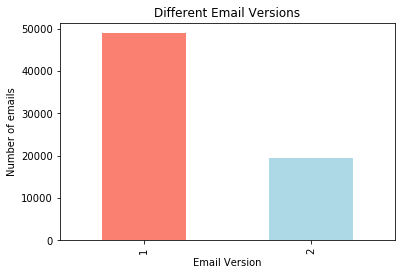

In [8]:
email_df.Email_Version.value_counts().plot(kind = 'bar',color = ['salmon','lightblue'])
print(email_df.Email_Version.value_counts())
plt.title('Different Email Versions')
plt.xlabel('Email Version')
plt.ylabel('Number of emails')
plt.show()

From the above graph we get to know that the `personalised` emails were sent more.

1    37149
2    31204
Name: Email_Text, dtype: int64


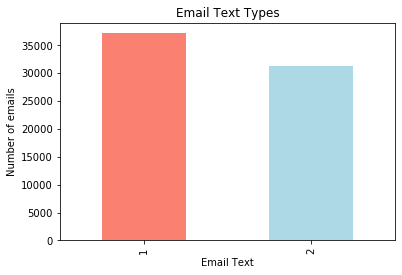

In [9]:
email_df.Email_Text.value_counts().plot(kind = 'bar',color = ['salmon','lightblue'])
print(email_df.Email_Text.value_counts())
plt.title('Email Text Types')
plt.xlabel('Email Text')
plt.ylabel('Number of emails')
plt.show()

From the above graph we get to know that `long text` emails were sent more.

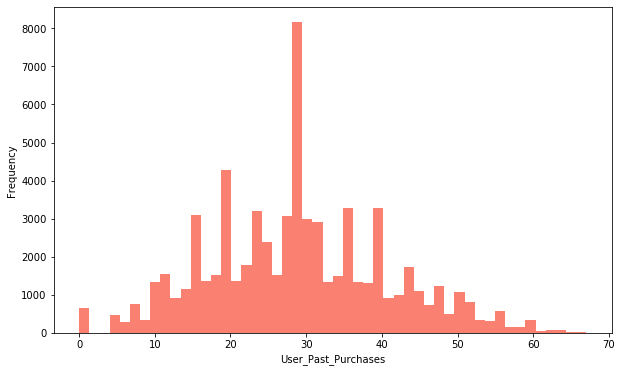

In [10]:
plt.figure(figsize = (10,6))
email_df['User_Past_Purchases'].plot(bins = 50,kind = 'hist',color = 'salmon')
plt.xlabel('User_Past_Purchases')
plt.ylabel('Frequency')
plt.show()

Frm the above we get to know that users purchases were more in the range of `10-50'.

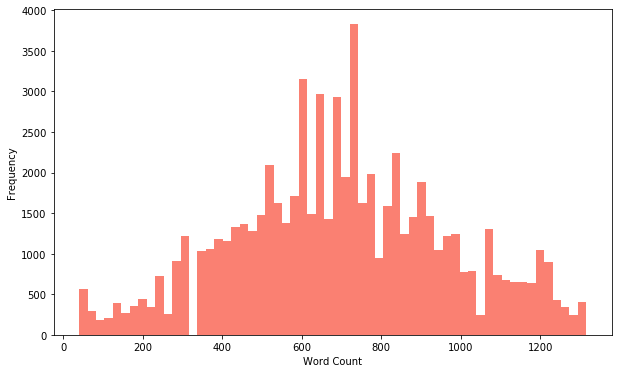

In [11]:
plt.figure(figsize = (10,6))
email_df['Word_Count'].plot(bins = 60,kind = 'hist',color = 'salmon')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

From the above graph we get to know that the word count were more from the range 300 to 1200`.

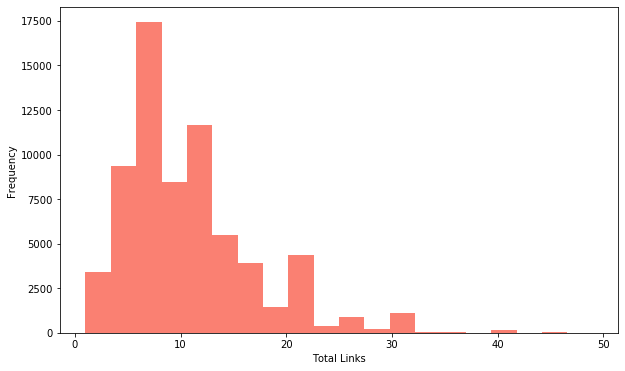

In [12]:
plt.figure(figsize = (10,6))
email_df['Total_Links'].plot(bins = 20,kind = 'hist',color = 'salmon')
plt.xlabel('Total Links')
plt.ylabel('Frequency')
plt.show()

From the above graph we get to know that the total links sent were more in the range `1-20`

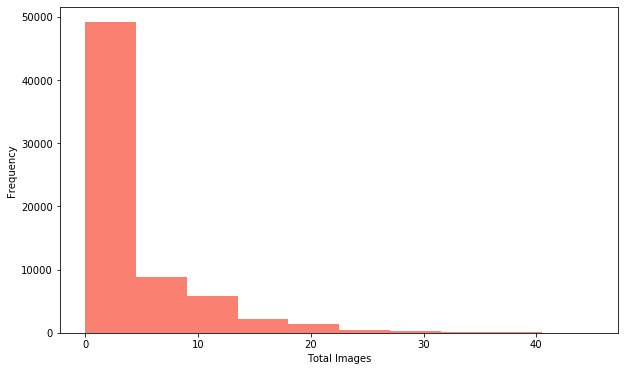

In [13]:
plt.figure(figsize = (10,6))
email_df['Total_Images'].plot(bins = 10,kind = 'hist',color = 'salmon')
plt.xlabel('Total Images')
plt.ylabel('Frequency')
plt.show()

From the above graph we get to know that only `1` image were sent more in the emails.

2    41129
1    13636
3    13588
Name: Time_Email_sent_Category, dtype: int64


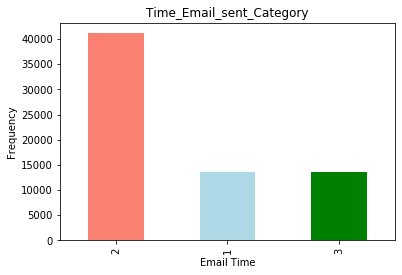

In [14]:
email_df.Time_Email_sent_Category.value_counts().plot(kind = 'bar',color = ['salmon','lightblue','green'])
print(email_df.Time_Email_sent_Category.value_counts())
plt.title('Time_Email_sent_Category')
plt.xlabel('Email Time')
plt.ylabel('Frequency')
plt.show()

From the above graph we get to know that the emails were sent more in the `afternoon`.

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64


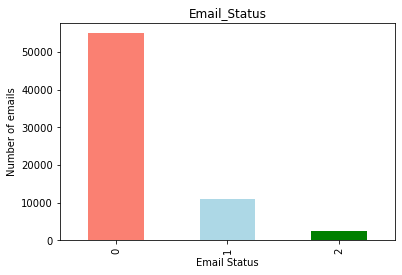

In [15]:
email_df.Email_Status.value_counts().plot(kind = 'bar',color = ['salmon','lightblue','green'])
print(email_df.Email_Status.value_counts())
plt.title('Email_Status')
plt.xlabel('Email Status')
plt.ylabel('Number of emails')
plt.show()

From the above graph we get to know that out of total emails sent, `54941` emails were not opened. `11039` emails were actually opened. And `2373` links were clicked in the emails.

## Creating a model

### Creating Independent and Dependent variables

In [16]:
X = email_df.drop(['Email_Status'],axis = 1)
y = email_df['Email_Status']

### Splitting the data into training and test datsets

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### Creating a model using RandomForest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000,n_jobs = -1,random_state = 42)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Checking the important features

In [19]:
classifier.feature_importances_

array([0.01566543, 0.02246233, 0.24170454, 0.05301162, 0.36467211,
       0.16550085, 0.12273506, 0.00364076, 0.00555598, 0.00505132])

In [20]:
# Helper function for plotting feature importance
def plot_features(columns,importances,n=10):
    df = (pd.DataFrame({'features' : columns,
                       'feature_importances' : importances})
          .sort_values('feature_importances',ascending =False)
          .reset_index(drop=True))
    # Plot the dataframe we have created
    fig,ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance');
    ax.invert_yaxis()

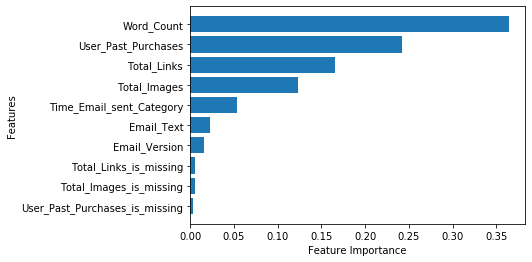

In [21]:
plot_features(X_train.columns,classifier.feature_importances_)

According to the model the most important features for the model are shown in the above graph.

### Checking the accuracy of the model on the test data

In [22]:
preds = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,preds)
acc = accuracy_score(y_test,preds)
print('Accuracy :' ,round(acc*100,2),'%')

Accuracy : 78.57 %


From Random Forest Classifier we get an accuracy of `78.57%`.

In [24]:
print(cm)

[[10445   490    71]
 [ 1844   288    45]
 [  387    93     8]]


In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     11006
           1       0.33      0.13      0.19      2177
           2       0.06      0.02      0.03       488

    accuracy                           0.79     13671
   macro avg       0.41      0.37      0.37     13671
weighted avg       0.72      0.79      0.74     13671



### Creating a model using XGBoost

In [26]:
from xgboost import XGBClassifier
cls= XGBClassifier(n_estimators=200,max_depth=4,learning_rate = 0.1,n_jobs = -1)
cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Checking the accuracy of the model on the test dataset

In [27]:
predictions = cls.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,predictions)
acc = accuracy_score(y_test,predictions)
print('Accuracy :' ,round(acc*100,2),'%')

Accuracy : 81.16 %


From XGBoost Classifier we get an accuracy of `81.16%`.

In [34]:
print(cm)

[[10922    83     1]
 [ 2004   172     1]
 [  431    55     2]]


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11006
           1       0.55      0.08      0.14      2177
           2       0.50      0.00      0.01       488

    accuracy                           0.81     13671
   macro avg       0.62      0.36      0.35     13671
weighted avg       0.76      0.81      0.74     13671



In [39]:
cls.feature_importances_

array([0.06873358, 0.10215946, 0.33653897, 0.02908825, 0.085235  ,
       0.1935862 , 0.03902198, 0.06625719, 0.0417065 , 0.03767285],
      dtype=float32)

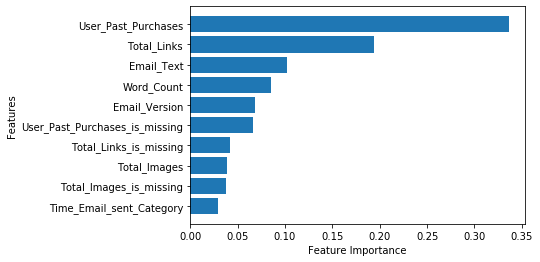

In [40]:
plot_features(X_train.columns,cls.feature_importances_)

According to the model the most important features for the model are shown in the above graph.

### Checking the accuracy of the model on different test data using cross validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cls, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.00 %
Standard Deviation: 0.23 %


After performing cross validation on different set of test dataset we get an mean accuracy of `81.00%` with standard deviation of `0.23%`.

### Creating a model using Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100,200, 500], 'maX_depth': [1,2,4,6,8],
              'learning_rate': [0.1,0.2]}]
grid_search = GridSearchCV(estimator = cls,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.02 %
Best Parameters: {'learning_rate': 0.1, 'maX_depth': 1, 'n_estimators': 100}
